# **Projekt i Deep Learning av Viktor Gran**

I detta projekt kommer jag att träna upp en modell som kan prediktera ifall ett vin är bra eller dåligt baserat på en rad faktorer.

## Importerar nödvändiga bibliotek:

In [133]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#from sklearn.metrics import accuracy_score
#from sklearn.ensemble import RandomForestClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


## Läser av och inspekterar datan:

In [134]:
wine = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [135]:
print(wine.shape) #1600 rader och 12 kolumner
wine.head(n=10) #printar ut första 10 raderna.

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [136]:
#Beskrivning av datan för att se vad för data det är att jobba med:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Från tabellen ovan kan man utläsa medelvärde, median, minsta värde och högsta värde för de 12 olika attributen.

Exempelvis värdena för Quality:
minvärdet är 3.0,
medianen är 6.0,
maxvärdet är 8.0,
och medelvärdet är 5.63.

# Data Analys:

## Undersökning av fördelningen hos de olika attributen för vinerna:



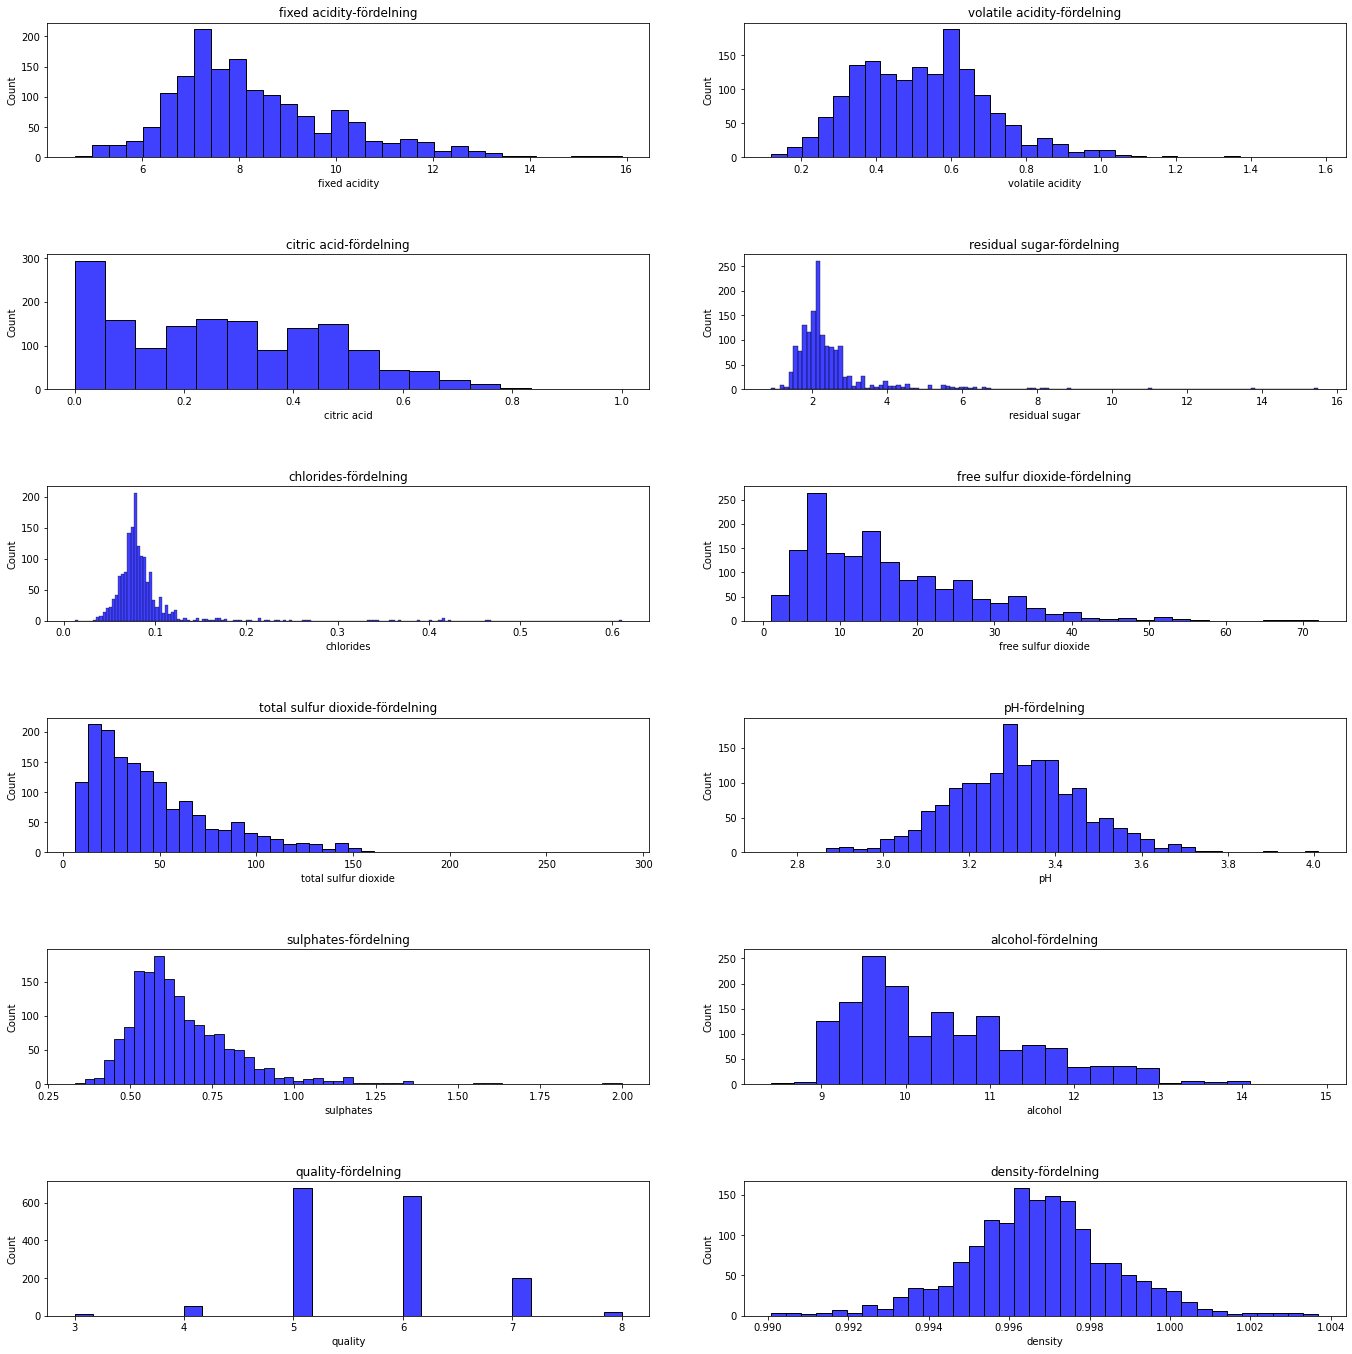

In [137]:
fig, axes = plt.subplots(6,2, figsize=(20, 20))
axes = axes.flatten()

ind = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
       'pH', 'sulphates', 'alcohol', 'quality', 'density']

for i in range(len(ind)):
    sb.histplot(x=ind[i], data=wine, color='blue', ax = axes[i]).set(title = ind[i] + "-fördelning")

fig.tight_layout(pad = 5)

## Undersökning hur de olika attributen påverkar kvalitén

### **Från de barplots som tagits fram kan följande information avläsas:**
* Att **fixed acidity** inte påverkar kvalitén.
* Att **volatile acidity** påverkar kvalitén, ju lägre volatile acidity är desto bättre kvalité.
* Att **citric acid** påverkar kvalitén, ju högre citric acid desto bättre kvalité.
* Att **residual sugar** inte påverkar kvalitén.
* Att **chlorides** påverkar kvalitén, mindre chlorides bidrar till bättre kvalité.
* Att **free sulfur dioxide** inte påverkar kvalitén.
* Att **total sulfur dioxide** inte påverkar kvalitén.
* Att **pH** inte påverkar kvalitén.
* Att **sulphates** påverkar kvalitén, ju mer sulphates desto bättre kvalité.
* Att **alcohol** påverkar kvalitén, ju högre alcohol nivå desto bättre kvalité.


#### **Bidragande faktorer till bättre vinkvalité enligt mina barplots:**
*  **alcohol**
*  **sulphates**
*  **chlorides**
*  **volatile acidity**
*  **citric acid**

#### **Faktorer som inte bidrar till bättre vinkvalité enligt mina barplots:**
* **fixed acidity**
* **residual sugar**
* **free sulfur dioxide**
* **total sulfur dioxide**
* **pH**


### **Från min heatmap kan följande information avläsas:**
**Att kvalitén beror mestadels på följande faktorer och i följande ordning:**
1. alcohol
2. volatile acidity
3. sulphates
4. citric acid
5. total sulfur dioxide
6. density


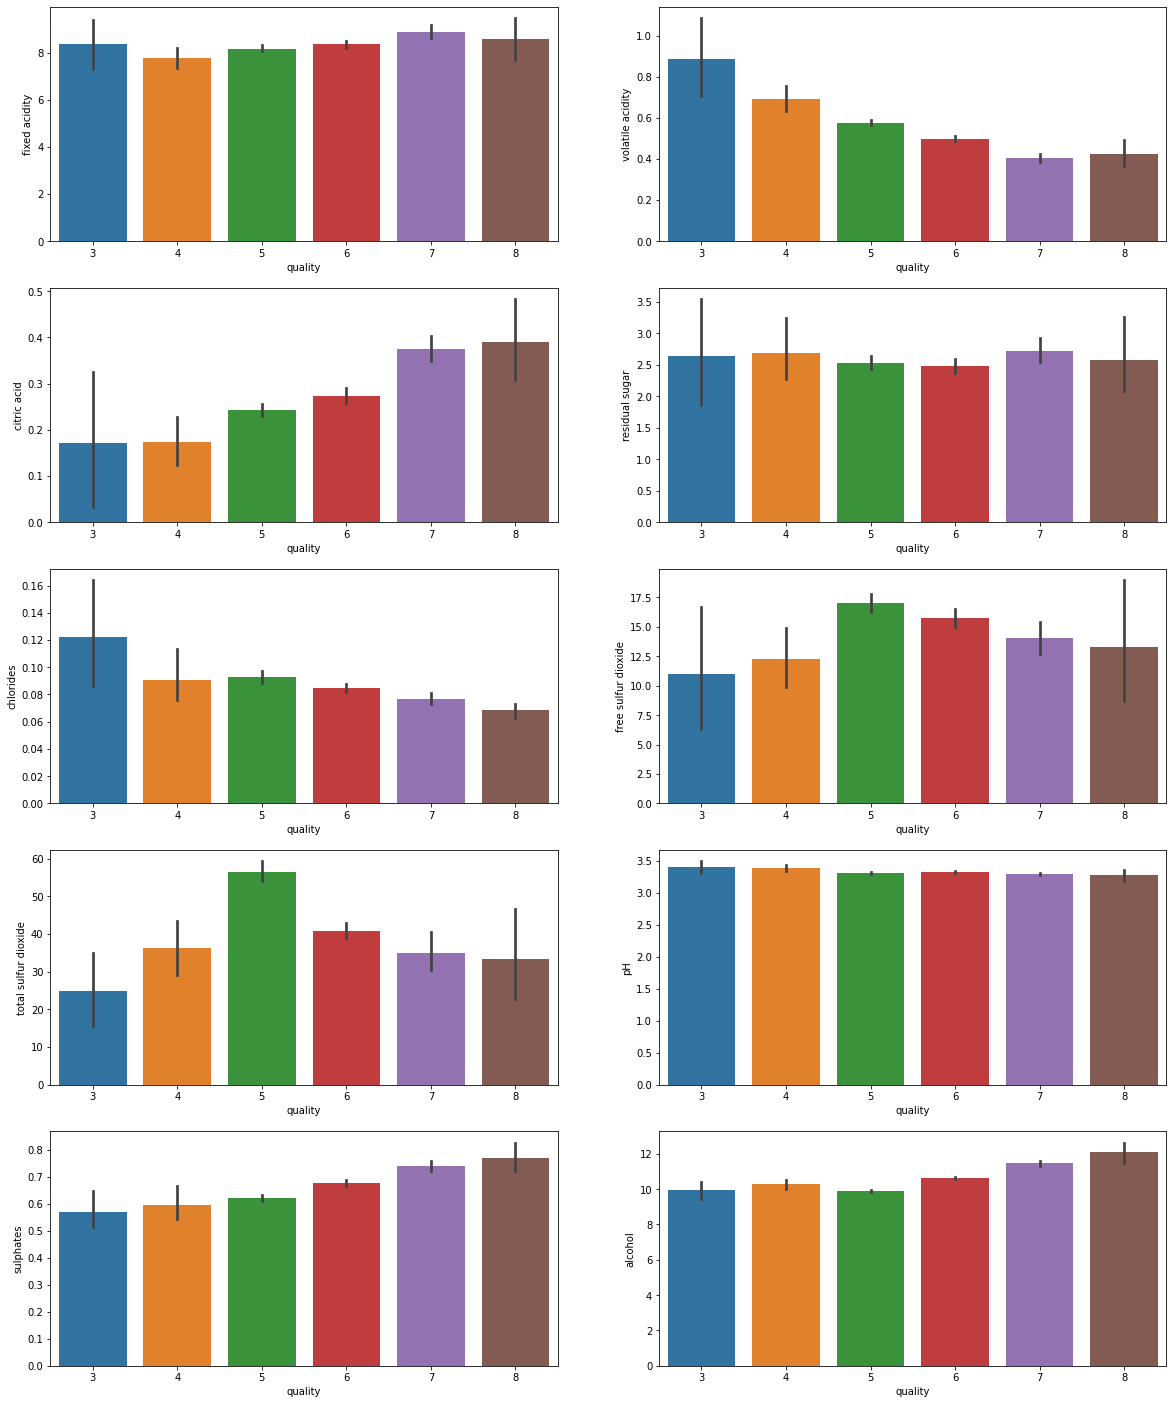

In [138]:
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
axes = axes.flatten()

ind = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
       'pH', 'sulphates', 'alcohol']

for i in range(len(ind)):
    sb.barplot(x = 'quality', y = ind[i], data = wine, ax = axes[i])


<AxesSubplot:>

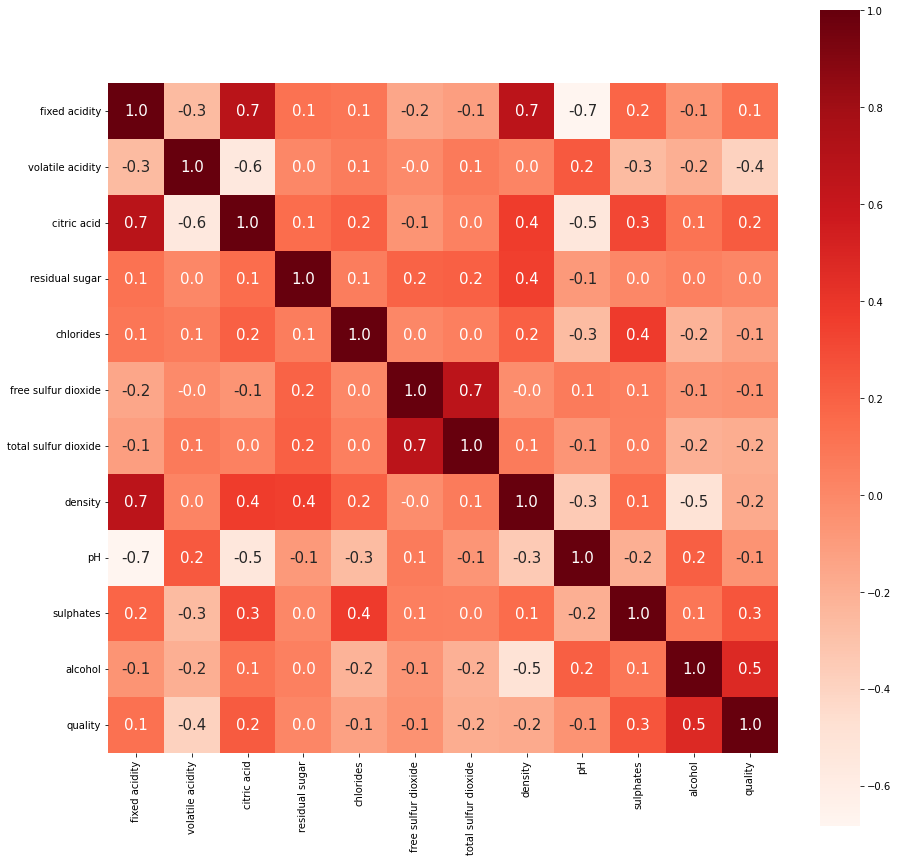

In [139]:
correlated = wine.corr()
plt.figure(figsize=(15,15))
sb.heatmap(correlated, cbar=True, cmap='Reds', square=True, fmt='.1f', annot = True, annot_kws={'size':15})

# Data Preprocessing

### Först så bestäms definitionen av vad ett bra och vad ett dåligt vin är:

jag sätter att bra viner har över 6 i kvalité och dåliga viner under 6 i kvalité.



In [140]:
wine["quality"] = np.where(wine["quality"] > 6, 1, 0)

### Sedan så delar jag upp datan i det som ska predikteras (y) och det som skall användas för att prediktera (x).

In [141]:
# bestämmer beroende variabeln
y = wine["quality"]

# bestämmer oberoende variabeln
x = wine.drop("quality", axis = 1)

In [142]:
#Delar upp min data i train-data och test-data

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    random_state = 1)

In [143]:
#Stardardisering av datan med hjälp av MinMaxScaler

norm = MinMaxScaler(feature_range = (0, 1))
norm.fit(x_train)
x_train = norm.transform(x_train)
x_test = norm.transform(x_test)


In [144]:
#Undersöker datan:
print("---------------------------x_train----------------------------")
print(x_train[0:3])
print()
print("---------------------------y_train----------------------------")
print(y_train[0:10])
print()
print("---------------------------x_test----------------------------")
print(x_test[0:3])
print()
print("---------------------------y_test----------------------------")
print(y_test[0:10])
print("-------------------------------------------------------------")
print()
print()
print()
print("-----------y_test antal bra respektive dåliga viner------------")
print(y_test.value_counts())
print("-----------y_train antal bra respektive dåliga viner---------")
print(y_train.value_counts())

---------------------------x_train----------------------------
[[0.23893805 0.1369863  0.23       0.10769231 0.090301   0.47887324
  0.23529412 0.4441896  0.54330709 0.17365269 0.26153846]
 [0.32743363 0.38013699 0.26       0.09230769 0.12040134 0.14084507
  0.13602941 0.57568807 0.4488189  0.11976048 0.12307692]
 [0.69911504 0.17808219 0.6        0.13076923 0.11538462 0.42253521
  0.24264706 0.72859327 0.28346457 0.23952096 0.32307692]]

---------------------------y_train----------------------------
1144    0
73      0
446     0
399     0
647     0
833     0
305     0
421     1
561     0
538     1
Name: quality, dtype: int64

---------------------------x_test----------------------------
[[0.37168142 0.19863014 0.64       0.1        0.13545151 0.11267606
  0.13235294 0.65214067 0.62992126 0.19760479 0.32307692]
 [0.36283186 0.34931507 0.28       0.13846154 0.14046823 0.22535211
  0.23161765 0.5558104  0.40944882 0.17964072 0.27692308]
 [0.51327434 0.15068493 0.58       0.21538462 0.270

# Skapar en modell för maskininlärning:

In [145]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError, MeanSquaredError

In [146]:
#bygger modellen

model = Sequential([
    Dense(units=10, input_shape=(11,), activation='relu'),
    Dropout(0.2),
    Dense(units=20, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])

In [147]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                120       
_________________________________________________________________
dropout_12 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 20)                220       
_________________________________________________________________
dropout_13 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 21        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [148]:
#

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy',
  metrics=['accuracy'])

In [149]:
#tränar modellen

es=tf.keras.callbacks.EarlyStopping('val_loss', patience=5, restore_best_weights = True)

history = model.fit(x=x_train, y=y_train, callbacks=[es], validation_split=0.1, batch_size=10, epochs=300, 
                                    shuffle=True, verbose=1)

Epoch 1/300
108/108 [==============================] - 1s 4ms/step - loss: 0.7222 - accuracy: 0.2938 - val_loss: 0.7145 - val_accuracy: 0.1417
Epoch 2/300
108/108 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5338 - val_loss: 0.6865 - val_accuracy: 0.7417
Epoch 3/300
108/108 [==============================] - 0s 3ms/step - loss: 0.6619 - accuracy: 0.7915 - val_loss: 0.6587 - val_accuracy: 0.8417
Epoch 4/300
108/108 [==============================] - 0s 3ms/step - loss: 0.6362 - accuracy: 0.8424 - val_loss: 0.6288 - val_accuracy: 0.8417
Epoch 5/300
108/108 [==============================] - 0s 3ms/step - loss: 0.6026 - accuracy: 0.8582 - val_loss: 0.5950 - val_accuracy: 0.8417
Epoch 6/300
108/108 [==============================] - 0s 3ms/step - loss: 0.5669 - accuracy: 0.8582 - val_loss: 0.5599 - val_accuracy: 0.8417
Epoch 7/300
108/108 [==============================] - 0s 3ms/step - loss: 0.5323 - accuracy: 0.8591 - val_loss: 0.5272 - val_accuracy: 0.8417

In [150]:
test_loss, test_acc = model.evaluate(x=x_test,y=y_test,batch_size = 10)
print("test accuracy = %.3f" % test_acc)


40/40 [==============================] - 0s 2ms/step - loss: 0.2660 - accuracy: 0.9000
test accuracy = 0.900
